# Exercise 5 - Coalition

## Project Imports

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.font_manager
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import scipy as sp
import pylab as P
import random

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
labels_dictionary = {0.0: "Blue",
                     1.0: "Brown",
                     2.0: "Green",
                     3.0: "Grey",
                     4.0: "Orange",
                     5.0: "Pink",
                     6.0: "Purple",
                     7.0: "Red",
                     8.0: "White",
                     9.0: "Yellow"}

## Project Utilities

In [0]:
def group_by_count(list):
  result = {}
  for item in list:
    if item in result:
      result[item] += 1
    else:
      result[item] = 1
  return result

def display_parties_count(y):
  parties_samples = group_by_count(y)
  print "Party | Count"
  print "----- | -----"
  for party, count in parties_samples.iteritems():
    print "{0}   | {1}".format(party, count)
  print "----- | -----"
  print "Total | {0}".format(len(y))
  
def get_parties_dataframes(X, y):
  label_column = y.columns[0]
  parties_dataframes_dictionary = {}
  for party in labels_dictionary.keys():
    party_samples_indexes = y.index[y[label_column] == party].tolist()
    print len(party_samples_indexes)
    parties_dataframes_dictionary[party] = X.loc[party_samples_indexes]
  return parties_dataframes_dictionary

# 0. Load the predicted dataset

##  First run "!ls" command to check if it's already in the vm

In [0]:
!mkdir BAK
!cp *.csv BAK/
!rm *.csv
!ls

## Download the train dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1JjJkErX4hpyzJEht6QA5YjCa7YlpTZL0'})
downloaded.GetContentFile('predicted_dataset.csv')

In [0]:
!ls

BAK  datalab  predicted_dataset.csv


## Load the predicted dataset into dataframes (X, y)

In [0]:
original_predicted_X = pd.read_csv("predicted_dataset.csv", header=0)
predicted_y = original_predicted_X[["PredictVote"]]
predicted_X = original_predicted_X.drop(["IdentityCard_Num", "PredictVote"], axis=1)

predicted_y_values = predicted_y["PredictVote"].tolist()

## View the loaded predicted dataset

In [0]:
predicted_X.info()
predicted_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  10000 non-null float64
Yearly_IncomeK                                   10000 non-null float64
Overall_happiness_score                          10000 non-null float64
Avg_Satisfaction_with_previous_vote              10000 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    10000 non-null float64
Weighted_education_rank                          10000 non-null float64
Will_vote_only_large_party_1.0                   10000 non-null int64
Will_vote_only_large_party_0.0                   10000 non-null int64
Will_vote_only_large_party_2.0                   10000 non-null int64
Most_Important_Issue_4.0                         10000 non-null int64
Most_Important_Issue_5.0                         10000 non-null int64
Most_Important_Issue_1.0                         10000 non-null int64
Most_Important_Issue_2.0                

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_5.0,Most_Important_Issue_1.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_3.0,Most_Important_Issue_7.0,Most_Important_Issue_6.0
0,8.0,-0.178662,-0.393790,0.176517,-0.498407,-0.149912,1,0,0,1,0,0,0,0,0,0,0
1,6.0,0.225238,-0.596577,0.071124,-0.422856,-0.271918,0,1,0,0,1,0,0,0,0,0,0
2,14.0,1.518685,0.695575,1.551261,-0.504231,-0.130677,0,0,1,0,0,1,0,0,0,0,0
3,5.0,-0.375136,-0.443474,-0.814019,-0.499401,-0.039032,1,0,0,0,0,0,1,0,0,0,0
4,15.0,1.089040,1.302127,-1.488676,-1.848972,1.429066,0,0,1,0,0,1,0,0,0,0,0


In [0]:
predicted_y.info()
predicted_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
PredictVote    10000 non-null float64
dtypes: float64(1)
memory usage: 78.2 KB


,PredictVote
0,1.0
1,4.0
2,9.0
3,1.0
4,9.0


##Split the predicted dataset by each party

In [0]:
display_parties_count(predicted_y_values)

Party | Count
----- | -----
0.0   | 895
1.0   | 1873
2.0   | 1032
3.0   | 662
4.0   | 462
5.0   | 1213
6.0   | 2645
7.0   | 569
8.0   | 188
9.0   | 461
----- | -----
Total | 10000


In [0]:
predicted_parties_dataframes_dictionary = get_parties_dataframes(predicted_X, predicted_y)

895
1873
1032
662
462
1213
2645
569
188
461


# 1. Load the train dataset

##  First run "!ls" command to check if it's already in the vm

In [0]:
!mkdir BAK
!cp *.csv BAK/
!rm *.csv
!ls

mkdir: cannot create directory ‘BAK’: File exists
BAK  datalab


## Download the labeled dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1mwrxBXZsgHLFO9IpWYXNfUFJnLT5yraj'})
downloaded.GetContentFile('train_X.csv')

downloaded = drive.CreateFile({'id': '1FHPumn9bdXiLzO5tbpGGrcvxzNpoCG0Z'})
downloaded.GetContentFile('train_y.csv')

## Load the train dataset into dataframes (X, y)

In [0]:
train_X = pd.read_csv("train_X.csv", header=0)
train_y = pd.read_csv("train_y.csv", header=None)
train_y.columns = ["Vote"]

train_y_values = train_y["Vote"]

## View the loaded train dataset

In [0]:
train_X.info()
train_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  5831 non-null float64
Yearly_IncomeK                                   5831 non-null float64
Overall_happiness_score                          5831 non-null float64
Avg_Satisfaction_with_previous_vote              5831 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    5831 non-null float64
Weighted_education_rank                          5831 non-null float64
Will_vote_only_large_party_1.0                   5831 non-null int64
Will_vote_only_large_party_0.0                   5831 non-null int64
Will_vote_only_large_party_2.0                   5831 non-null int64
Most_Important_Issue_4.0                         5831 non-null int64
Most_Important_Issue_1.0                         5831 non-null int64
Most_Important_Issue_7.0                         5831 non-null int64
Most_Important_Issue_5.0                         5831

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,9.0,-1.135556,-4.210137,2.806640,-0.919437,3.395327,0,0,1,0,0,0,0,1,0,0,0
1,14.0,-0.674079,0.886686,1.802433,-0.102686,-0.133469,0,0,1,0,0,0,0,0,1,0,0
2,8.0,-0.965695,0.340745,-0.450976,0.477329,-0.416028,0,1,0,0,0,0,1,0,0,0,0
3,6.0,-0.093311,-0.093619,-0.650299,0.733155,-1.309064,1,0,0,0,0,0,0,1,0,0,0
4,6.0,2.259453,0.146151,0.304831,2.579338,0.818161,1,0,0,0,0,1,0,0,0,0,0


In [0]:
train_y.info()
train_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 1 columns):
Vote    5831 non-null float64
dtypes: float64(1)
memory usage: 45.6 KB


,Vote
0,0.0
1,0.0
2,4.0
3,1.0
4,5.0


##Split the train dataset by each party

In [0]:
display_parties_count(train_y_values)

Party | Count
----- | -----
0.0   | 484
1.0   | 1115
2.0   | 977
3.0   | 331
4.0   | 320
5.0   | 627
6.0   | 1240
7.0   | 325
8.0   | 202
9.0   | 210
----- | -----
Total | 5831


In [0]:
train_parties_dataframes_dictionary = get_parties_dataframes(train_X, train_y)

484
1115
977
331
320
627
1240
325
202
210


#2. Train the clustering model

## GMM - Gaussian Mixture Model

###Find Optimal GMM Configuration

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

plt.rcParams.update(plt.rcParamsDefault)

def silhouette_func(X, Y, GMM_array, number_of_gaussians):
  cluster_counter=0
  for n_clusters in number_of_gaussians:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.15, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    cluster_model_description, cluster_model = GMM_array[cluster_counter]
    cluster_model.fit(X)
    cluster_labels = cluster_model.predict(X)
        
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()
    cluster_counter += 1

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

plt.rcParams.update(plt.rcParamsDefault)

def find_best_GMM_configuration(X, y, GMM_array, number_of_gaussians, k_folds = 10):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        - and indeed, they came up nearly identical. 
        - So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []
  kf = StratifiedKFold(n_splits=k_folds)
  kf.get_n_splits(X)
  
  for name, cls in GMM_array:
    aic = 0
    bic = 0

    for (X_index, y_index) in kf.split(X, y):
      ## NOTE: using label (y) while training GMM is using External evaluation method
      ##       which checks the Purity of the created clusters (i.e, how much the clusters consist of one class... how much they are Monotonous)
      cls.fit(X.iloc[X_index], y.iloc[X_index])
      y_pred = cls.predict(X.iloc[y_index])
      aic = aic + cls.aic(X.iloc[y_index])
      bic = bic + cls.bic(X.iloc[y_index])

    avg_aic = aic / k_folds
    avg_bic = bic / k_folds
    bic_arr.append(avg_bic)
    aic_arr.append(avg_aic)
    print(name + " has scored AIC: " + str(avg_aic) + " and BIC: " + str(avg_bic))
  
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIS by Number of Gaussians')
  plt.ylabel('BIS')
  plt.xlabel('Number of Gaussians')
  plt.annotate('Local Minimum', xy=(30, -58500), xytext=(20, -42500), arrowprops=dict(facecolor='black', shrink=0.05),)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIS by Number of Gaussians')
  plt.ylabel('AIS')
  plt.xlabel('Number of Gaussians')
  plt.show()

### GMM Clustering Hyperparameter Optimization (Number of gaussians)

#### AIC & BIC Scoring

GMM with 5 components has scored AIC: -36796.894851840945 and BIC: -36036.80204766655
GMM with 10 components has scored AIC: -51920.685048070496 and BIC: -50396.131090272436
GMM with 15 components has scored AIC: -57810.19863492453 and BIC: -55521.1835235028
GMM with 20 components has scored AIC: -59768.816577109064 and BIC: -56715.34031206366
GMM with 25 components has scored AIC: -61741.86602758472 and BIC: -57923.92860891564
GMM with 30 components has scored AIC: -62960.84505323674 and BIC: -58378.446480943996
GMM with 40 components has scored AIC: -63317.480811515125 and BIC: -57206.159931975024
GMM with 50 components has scored AIC: -63459.99358140952 and BIC: -55819.750394622075


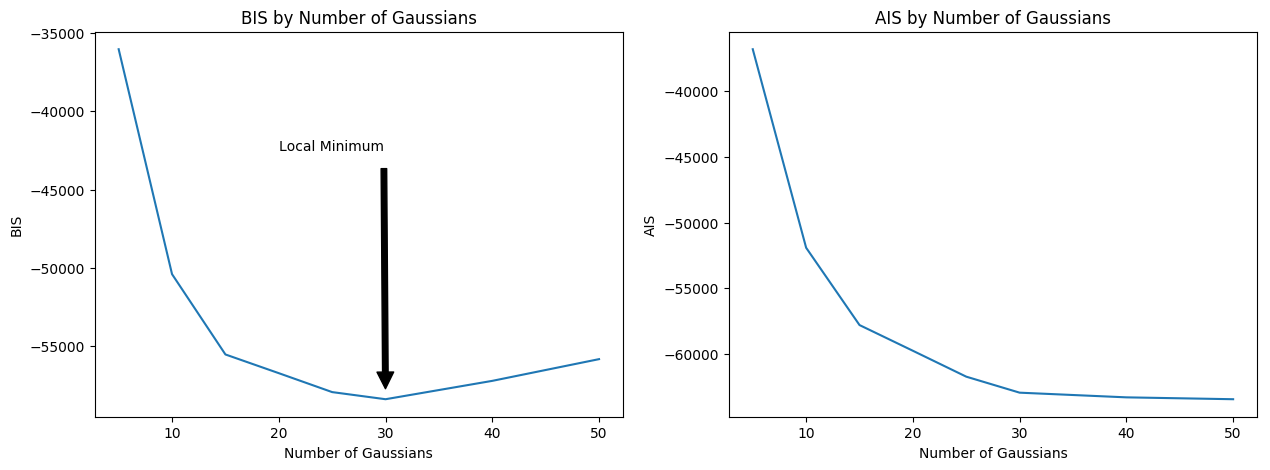

In [0]:
GMM_description = []
GMM_cls = []
gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]

for components in gaussians_componenets:
  GMM_description.append("GMM with {0} components".format(components))
  GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

GMM_array = zip(GMM_description, GMM_cls)
find_best_GMM_configuration(train_X, train_y_values, GMM_array, gaussians_componenets)

#### Silhouette Scoring

('For n_clusters =', 5, 'The average silhouette_score is :', -0.007864816390596182)


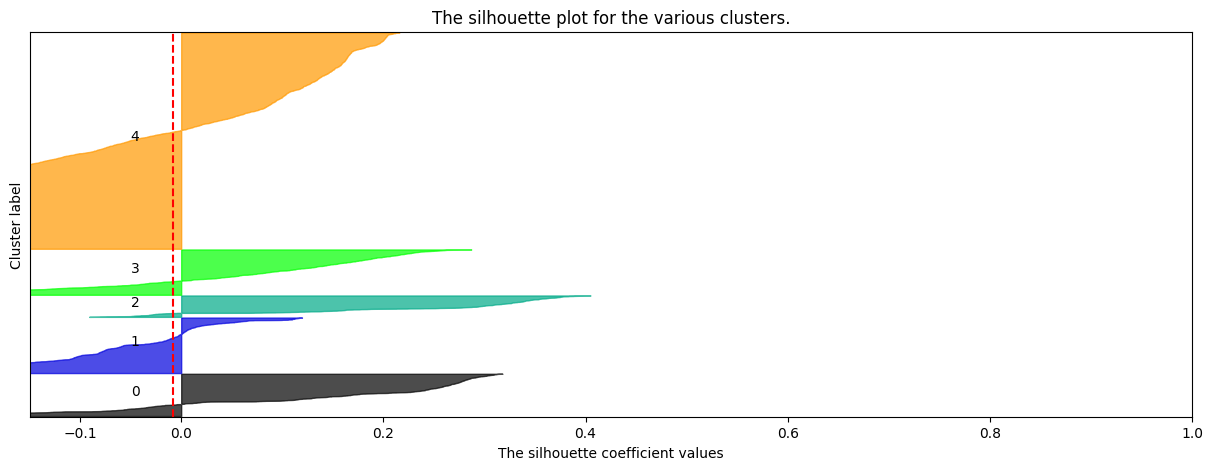

('For n_clusters =', 10, 'The average silhouette_score is :', -0.06996566568088133)


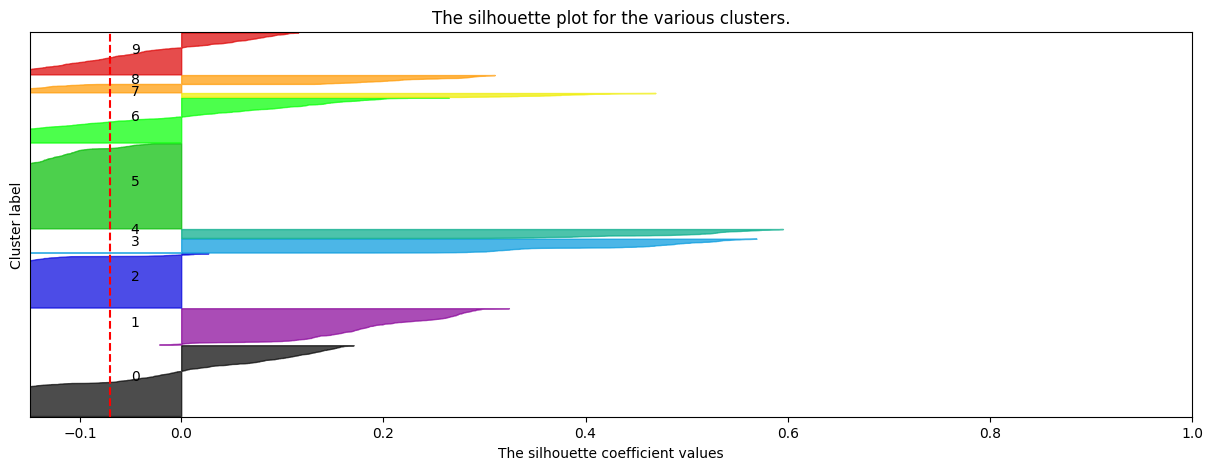

('For n_clusters =', 15, 'The average silhouette_score is :', -0.0792483492554279)


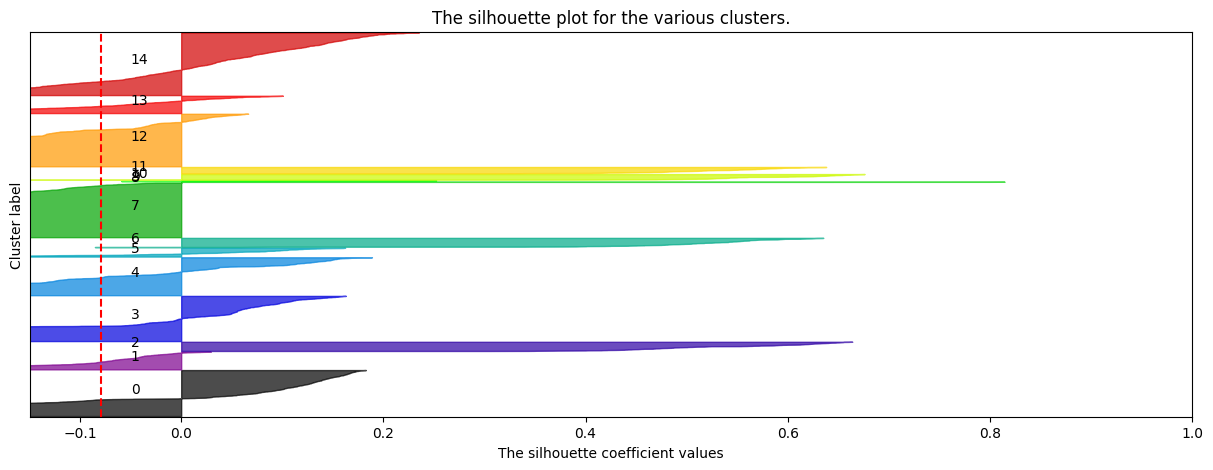

('For n_clusters =', 20, 'The average silhouette_score is :', -0.05505862569251671)


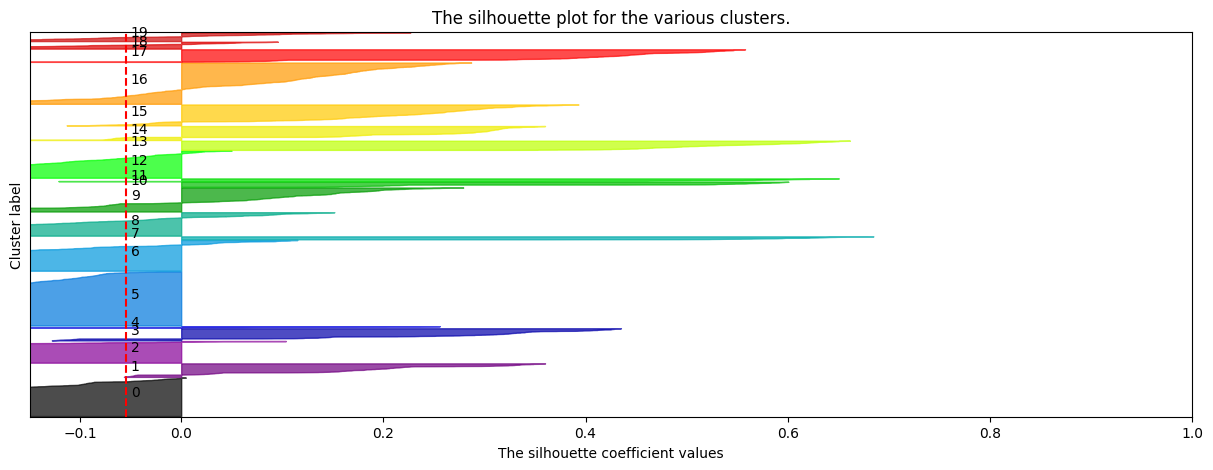

('For n_clusters =', 25, 'The average silhouette_score is :', -0.11550499226787007)


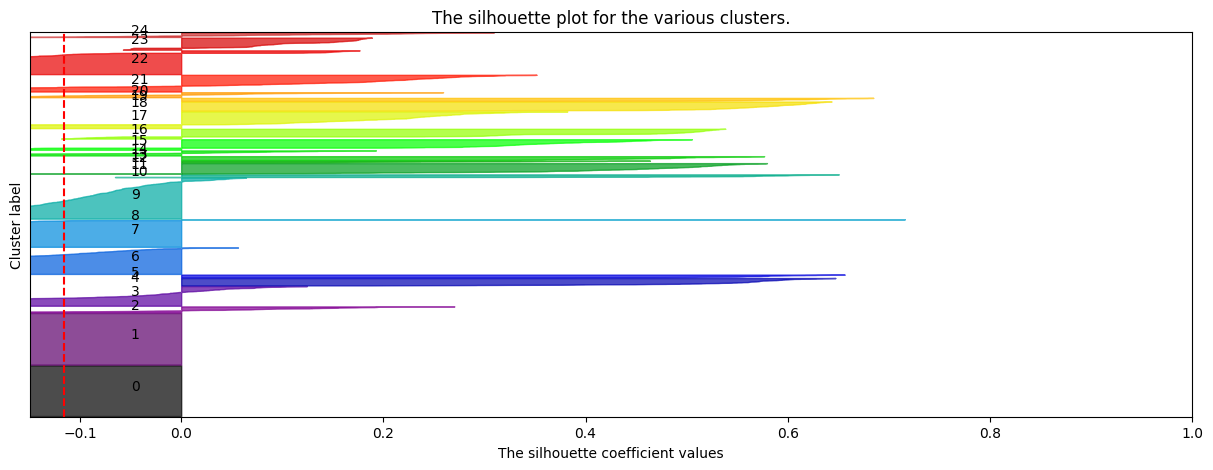

('For n_clusters =', 30, 'The average silhouette_score is :', -0.10554935048922137)


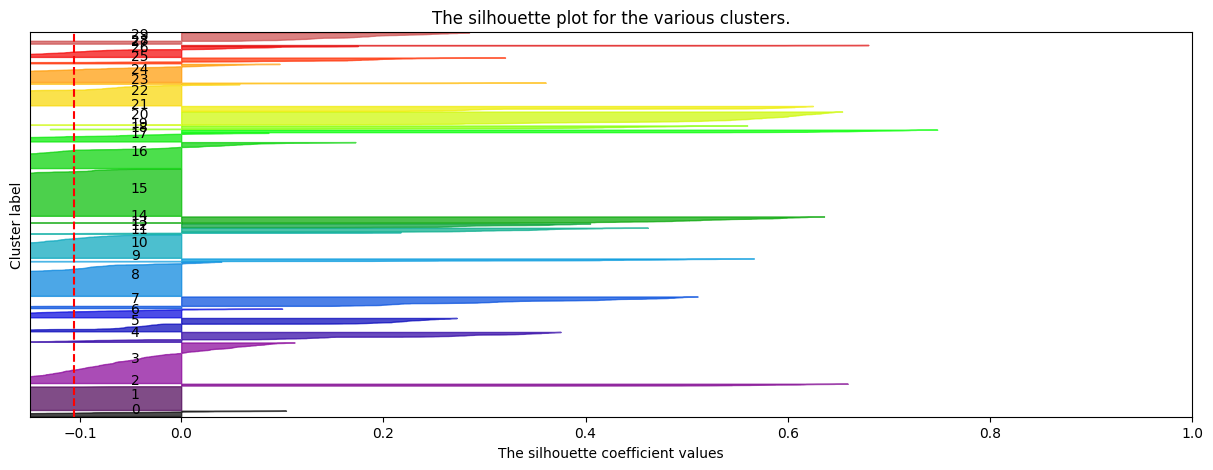

('For n_clusters =', 40, 'The average silhouette_score is :', -0.09563800713326977)


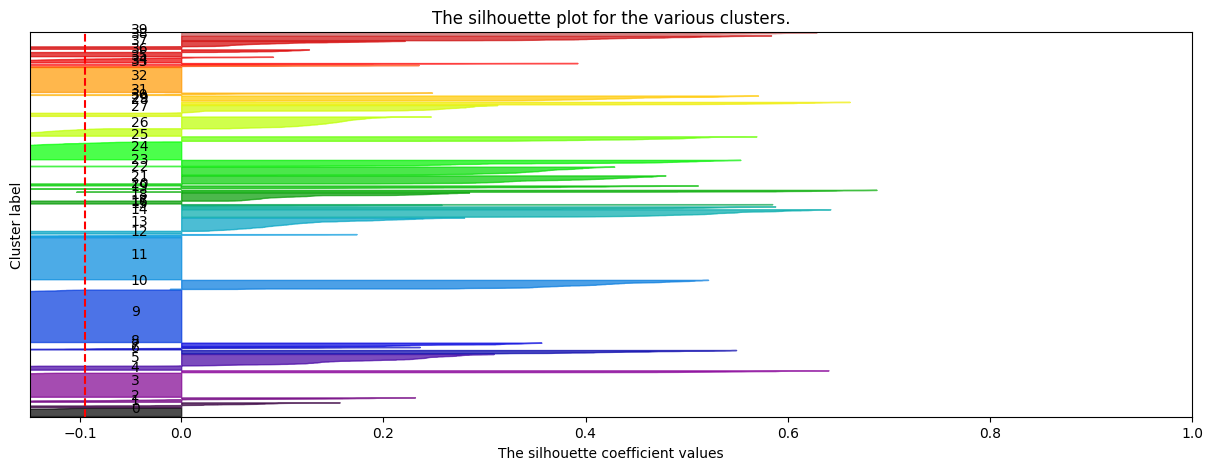

('For n_clusters =', 50, 'The average silhouette_score is :', -0.025831866225284876)


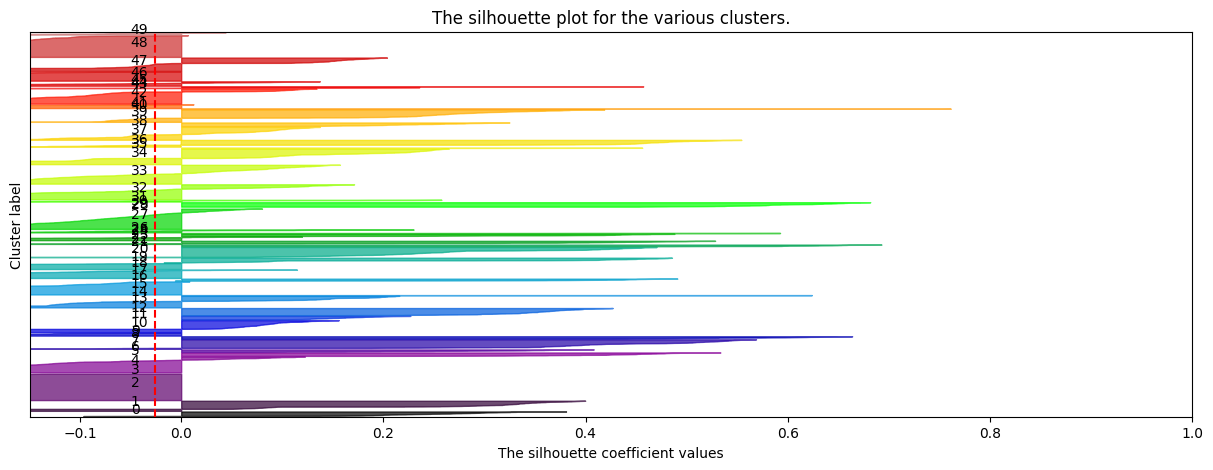

In [0]:
silhouette_func(train_X, train_y, GMM_array, gaussians_componenets)

###Choose Clustering Model Configuration (Manual) and Fit dataset 

In [0]:
selected_model_index = 5

cluster_count = gaussians_componenets[selected_model_index]
cluster_model_description, cluster_model = GMM_array[selected_model_index]
cluster_model.fit(train_X)

print cluster_model_description

GMM with 30 components


# 3. Load the valid dataset

## Download the valid dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1HgtZC1iq9VYH8Ygo6-6XnC6G0xa8Lz01'})
downloaded.GetContentFile('valid_X.csv')

downloaded = drive.CreateFile({'id': '1Z_0zOORoZJVlOQ58UdXml4maSNSNBBMK'})
downloaded.GetContentFile('valid_y.csv')

In [0]:
!ls

BAK  datalab  train_X.csv  train_y.csv	valid_X.csv  valid_y.csv


## Load the valid dataset into dataframes (X, y)

In [0]:
valid_X = pd.read_csv("valid_X.csv", header=0)
valid_y = pd.read_csv("valid_y.csv", header=None)
valid_y.columns = ["Vote"]

# fix df_label as df_label[0] for easy writing..
valid_y_values = valid_y["Vote"]

## View the loaded valid dataset

In [0]:
valid_X.info()
valid_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  1944 non-null float64
Yearly_IncomeK                                   1944 non-null float64
Overall_happiness_score                          1944 non-null float64
Avg_Satisfaction_with_previous_vote              1944 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    1944 non-null float64
Weighted_education_rank                          1944 non-null float64
Will_vote_only_large_party_1.0                   1944 non-null int64
Will_vote_only_large_party_0.0                   1944 non-null int64
Will_vote_only_large_party_2.0                   1944 non-null int64
Most_Important_Issue_4.0                         1944 non-null int64
Most_Important_Issue_1.0                         1944 non-null int64
Most_Important_Issue_7.0                         1944 non-null int64
Most_Important_Issue_5.0                         1944

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,12.0,-0.107043,-0.141038,0.691124,-0.480667,-0.275633,1,0,0,0,1,0,0,0,0,0,0
1,8.0,1.872975,-0.189318,-0.721718,1.867954,-0.110044,1,0,0,0,0,1,0,0,0,0,0
2,12.0,0.788380,1.631465,0.520939,-0.703350,0.511250,1,0,0,0,0,0,0,1,0,0,0
3,8.0,-0.098471,0.059599,0.688121,0.682170,-1.322242,1,0,0,1,0,0,0,0,0,0,0
4,9.0,-0.042849,0.565714,0.591769,-0.113672,-0.630451,1,0,0,0,0,1,0,0,0,0,0


In [0]:
valid_y.info()
valid_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 1 columns):
Vote    1944 non-null float64
dtypes: float64(1)
memory usage: 15.3 KB


,Vote
0,6.0
1,5.0
2,2.0
3,8.0
4,6.0


##Split the valid dataset by each party

In [0]:
display_parties_count(valid_y_values)

Party | Count
----- | -----
0.0   | 162
1.0   | 372
2.0   | 326
3.0   | 110
4.0   | 107
5.0   | 209
6.0   | 413
7.0   | 108
8.0   | 67
9.0   | 70
----- | -----
Total | 1944


In [0]:
valid_parties_dataframes_dictionary = get_parties_dataframes(valid_X, valid_y)

162
372
326
110
107
209
413
108
67
70


# 4. Load the test dataset

## Download the test dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '10F4pfym7OgqvT1xu6Bo27WqpZjsGhhih'})
downloaded.GetContentFile('test_X.csv')

downloaded = drive.CreateFile({'id': '1uGX6RQFot5gww3vExfpeg1GFR8ZMFYPX'})
downloaded.GetContentFile('test_y.csv')

In [0]:
!ls

BAK	 test_X.csv  train_X.csv  valid_X.csv
datalab  test_y.csv  train_y.csv  valid_y.csv


## Load the test dataset into dataframes (X, y)

In [0]:
test_X = pd.read_csv("test_X.csv", header=0)
test_y = pd.read_csv("test_y.csv", header=None)
test_y.columns = ["Vote"]

test_y_values = test_y["Vote"]

## View the loaded test dataset

In [0]:
test_X.info()
test_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  1944 non-null float64
Yearly_IncomeK                                   1944 non-null float64
Overall_happiness_score                          1944 non-null float64
Avg_Satisfaction_with_previous_vote              1944 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    1944 non-null float64
Weighted_education_rank                          1944 non-null float64
Will_vote_only_large_party_1.0                   1944 non-null int64
Will_vote_only_large_party_0.0                   1944 non-null int64
Will_vote_only_large_party_2.0                   1944 non-null int64
Most_Important_Issue_4.0                         1944 non-null int64
Most_Important_Issue_1.0                         1944 non-null int64
Most_Important_Issue_7.0                         1944 non-null int64
Most_Important_Issue_5.0                         1944

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,9.0,-0.419086,0.210792,-0.230510,-0.060646,-0.564397,1,0,0,0,0,0,0,1,0,0,0
1,8.0,0.514930,-0.619711,1.107421,-0.130600,-0.651318,1,0,0,0,0,0,0,1,0,0,0
2,13.0,0.779048,1.696267,-0.448178,-0.847467,0.694600,1,0,0,0,0,1,0,0,0,0,0
3,12.0,0.263978,0.147911,-0.669467,0.528262,-1.566185,1,0,0,0,0,0,0,1,0,0,0
4,10.0,-0.287698,0.103872,-0.726453,0.389199,-1.081211,0,1,0,0,0,0,0,0,0,0,1


In [0]:
test_y.info()
test_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 1 columns):
Vote    1944 non-null float64
dtypes: float64(1)
memory usage: 15.3 KB


,Vote
0,6.0
1,6.0
2,2.0
3,6.0
4,7.0


##Split the test dataset by each party

In [0]:
display_parties_count(test_y_values)

Party | Count
----- | -----
0.0   | 161
1.0   | 371
2.0   | 326
3.0   | 110
4.0   | 107
5.0   | 209
6.0   | 414
7.0   | 109
8.0   | 67
9.0   | 70
----- | -----
Total | 1944


In [0]:
valid_parties_dataframes_dictionary = get_parties_dataframes(test_X, test_y)

161
371
326
110
107
209
414
109
67
70


# 5. Apply the trained models on the valid/test dataset and check performance

##Utilities

In [0]:
from sklearn import metrics
import seaborn as sns

def get_predicted_clusters(cluster_model, X):
  cluster_labels = cluster_model.predict(X)
  print cluster_labels
  return cluster_labels


def plot_silhouette_graph_score(X, cluster_labels, scores):
  sns.set(style="white", color_codes=True)

  # note that this is the mean over all the samples - there might be some clusters 
  # that are well separated and others that are closer together. 
  # so let's look at the distribution of silhouette scores...  
  sns.distplot(scores)
  plt.show()
  
def plot_silhouette_score_per_party(cluster_labels, scores):
  df_scores = pd.DataFrame()
  df_scores['SilhouetteScore'] = scores
  df_scores['cluster_labels'] = cluster_labels
  df_scores.hist(by='cluster_labels', column='SilhouetteScore', range=(-1.0,1.0), bins=20);
  plt.show()

##Apply Clustering Model on the valid/test dataset 

In [0]:
valid_cluster_labels = get_predicted_clusters(cluster_model, valid_X)
valid_scores = metrics.silhouette_samples(valid_X, valid_cluster_labels)

test_cluster_labels = get_predicted_clusters(cluster_model, test_X)
test_scores = metrics.silhouette_samples(test_X, test_cluster_labels)

[15 29  6 ...  6  3  6]
[ 6  6  0 ... 15 16 18]


##Check Clustering Performance and Parties Preferences

### Silhouette Performance Score:
a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [0]:
print "Silhouette Performance Score (valid):"
plot_silhouette_score(valid_X, valid_cluster_labels)

Silhouette Performance Score (valid):


NameError: ignored

Silhouette Performance Score (test):


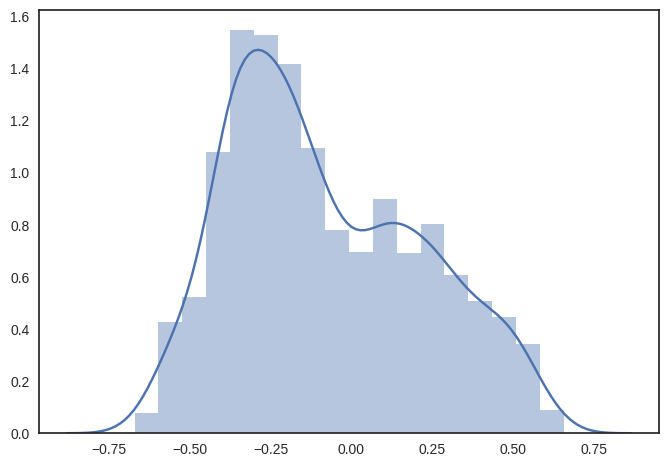

In [0]:
print "Silhouette Performance Score (test):"
plot_silhouette_score(test_X, test_cluster_labels)

### AIC & BIC Performance Check 

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

def check_GMM_performance(train_X, train_y, data_X, GMM_array, number_of_gaussians):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        + and indeed, they came up nearly identical. 
        ++ So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []

  for name, cls in GMM_array:
    cls.fit(train_X, train_y)
    y_pred = cls.predict(data_X)
    aic = cls.aic(data_X)
    bic = cls.bic(data_X)
    aic_arr.append(aic)
    bic_arr.append(bic)
    print(name + " has scored AIC: " + str(aic) + " and BIC: " + str(bic))
    
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIC by Number of Gaussians')
  plt.ylabel('BIC')
  plt.xlabel('Number of Gaussians')
  plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05),)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIC by Number of Gaussians')
  plt.ylabel('AIC')
  plt.xlabel('Number of Gaussians')
  plt.show()
  
def evaluate_performance(X, y, data_X):
  GMM_description = []
  GMM_cls = []
  gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]

  for components in gaussians_componenets:
    GMM_description.append("GMM with {0} components".format(components))
    GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

  GMM_array = zip(GMM_description, GMM_cls)
  check_GMM_performance(X, y, data_X, GMM_array, gaussians_componenets)

Silhouette Performance Score (valid):
GMM with 5 components has scored AIC: -112255.69875491041 and BIC: -111286.08323551687
GMM with 10 components has scored AIC: -191344.75527232763 and BIC: -189399.9517305555
GMM with 15 components has scored AIC: -198269.97319031894 and BIC: -195349.98162616824
GMM with 20 components has scored AIC: -194513.1377807398 and BIC: -190617.95819421057
GMM with 25 components has scored AIC: -216854.06760437018 and BIC: -211983.69999546238
GMM with 30 components has scored AIC: -208757.11388305924 and BIC: -202911.55825177286
GMM with 40 components has scored AIC: -219356.09493841988 and BIC: -211560.16326237636
GMM with 50 components has scored AIC: -221879.07303154297 and BIC: -212132.7653107423


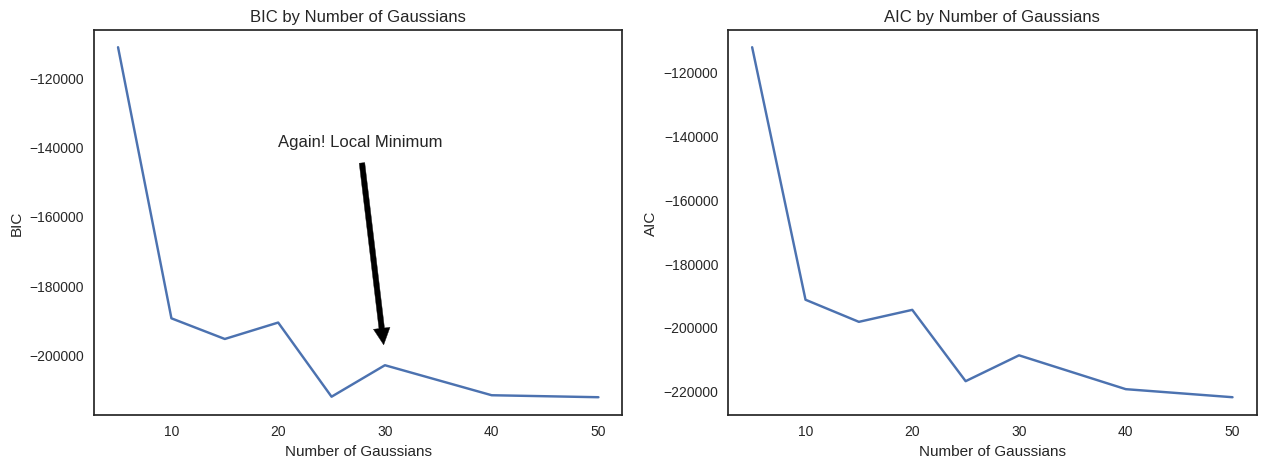

In [0]:
print "AIC & BIC Performance Score (valid):"
evaluate_performance(train_X, train_y, valid_X)

GMM with 5 components has scored AIC: -134892.6465269161 and BIC: -133923.03100752254
GMM with 10 components has scored AIC: -171443.0820541476 and BIC: -169498.2785123755
GMM with 15 components has scored AIC: -204829.56903460342 and BIC: -201909.57747045276
GMM with 20 components has scored AIC: -188365.96793744736 and BIC: -184470.78835091813
GMM with 25 components has scored AIC: -197811.5182638514 and BIC: -192941.1506549436
GMM with 30 components has scored AIC: -219082.47648037618 and BIC: -213236.9208490898
GMM with 40 components has scored AIC: -219900.9487976608 and BIC: -212105.01712161727
GMM with 50 components has scored AIC: -220446.16245465525 and BIC: -210699.8547338546


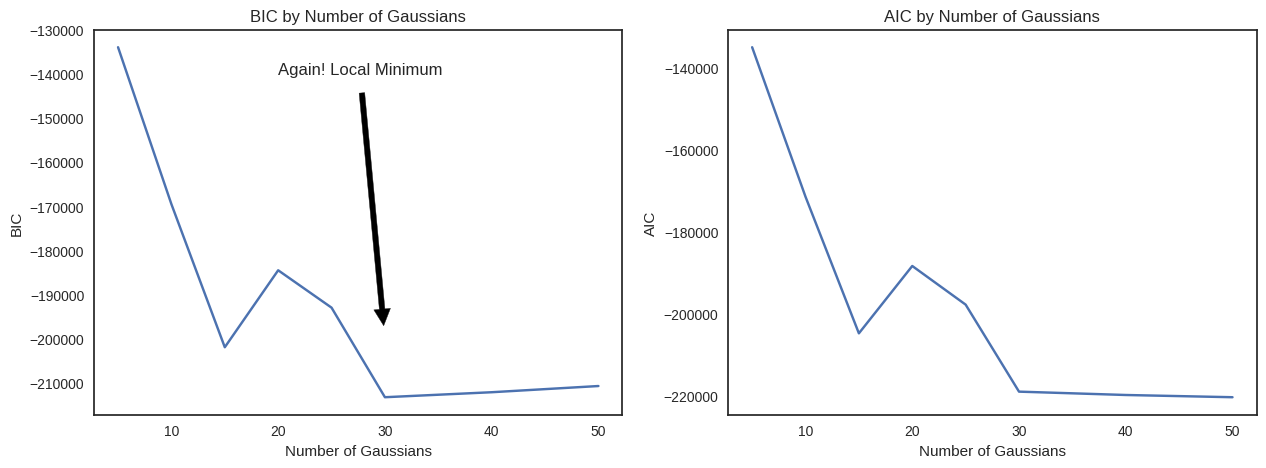

In [0]:
print "AIC & BIC Performance Score (test):"
evaluate_performance(train_X, train_y, test_X)

# 6. Create a Steady Coalition

## Utilities

In [0]:
import operator

def get_parties_size(predicted_labels):
  parties_size = group_by_count(predicted_labels)
  return parties_size

def display_parties_votes(predicted_labels):
  display_parties_count([predicted_labels])

def get_winning_party(parties_size):
  winning_party = max(parties_size.iteritems(), key=operator.itemgetter(1))[0]
  print "Winning Party: {0} ({1})".format(winning_party, labels_dictionary[winning_party])
  return winning_party, labels_dictionary[winning_party]

def plot_parties_votes_pie(parties_size, pie_size=10):
  labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
  colors = ["blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "white", "yellow"]
  prediction_values = parties_size.values()

  # Pie chart, where the slices will be ordered and plotted counter-clockwise:
  ratio = 0.0
  explode = (ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio)

  fig1, ax1 = plt.subplots(figsize=(pie_size,pie_size))
  ax1.pie(prediction_values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  
def simulate_elections(predicted_labels, pie_size=10):
  parties_size = get_parties_size(predicted_labels)
  display_parties_votes(predicted_labels)
  print ""
  winning_party = get_winning_party(parties_size)
  plot_parties_votes_pie(parties_size, pie_size)

## Apply Clustering Model on unlabeled dataset

In [0]:
predicted_cluster_labels = get_predicted_clusters(cluster_model, predicted_X)
predicted_scores = metrics.silhouette_samples(predicted_X, predicted_cluster_labels)

[29 21 11 ...  2 22 25]


In [0]:
parties_size = get_parties_size(predicted_y_values)
print parties_size
total_parties_size = sum(parties_size.values())
print total_parties_size

{0.0: 895, 1.0: 1873, 2.0: 1032, 3.0: 662, 4.0: 462, 5.0: 1213, 6.0: 2645, 7.0: 569, 8.0: 188, 9.0: 461}
10000


Silhouette Performance Score (predicted):


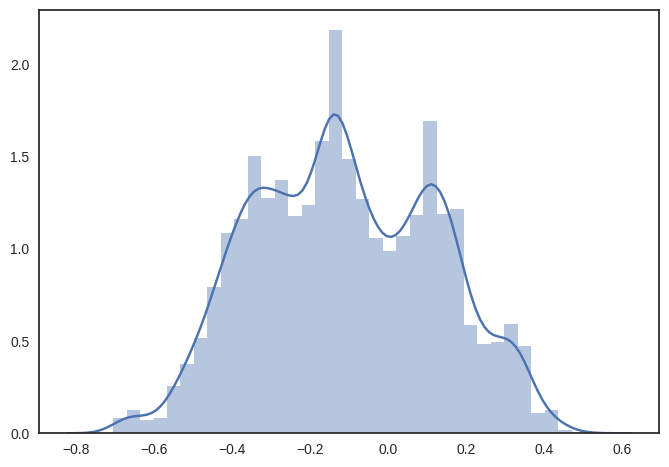

In [0]:
print "Silhouette Performance Score (predicted):"
plot_silhouette_score(predicted_X, predicted_cluster_labels)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

def check_GMM_performance(train_X, train_y, data_X, GMM_array, number_of_gaussians):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        + and indeed, they came up nearly identical. 
        ++ So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []

  for name, cls in GMM_array:
    cls.fit(train_X, train_y)
    y_pred = cls.predict(data_X)
    aic = cls.aic(data_X)
    bic = cls.bic(data_X)
    aic_arr.append(aic)
    bic_arr.append(bic)
    print(name + " has scored AIC: " + str(aic) + " and BIC: " + str(bic))
    
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIC by Number of Gaussians')
  plt.ylabel('BIC')
  plt.xlabel('Number of Gaussians')
  #plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05),)
  #plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05), clip_on=True)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIC by Number of Gaussians')
  plt.ylabel('AIC')
  plt.xlabel('Number of Gaussians')
  plt.show()
  
def evaluate_performance(X, y, data_X):
  GMM_description = []
  GMM_cls = []
  gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]

  for components in gaussians_componenets:
    GMM_description.append("GMM with {0} components".format(components))
    GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

  GMM_array = zip(GMM_description, GMM_cls)
  check_GMM_performance(X, y, data_X, GMM_array, gaussians_componenets)

AIC & BIC Performance Score (predicted):
GMM with 5 components has scored AIC: 5640389773.716803 and BIC: 5640391028.316028
GMM with 10 components has scored AIC: 4467138625.946371 and BIC: 4467141142.355161
GMM with 15 components has scored AIC: 4467089307.768033 and BIC: 4467093085.986388
GMM with 20 components has scored AIC: 4467121172.467778 and BIC: 4467126212.495698
GMM with 25 components has scored AIC: 4467078355.219974 and BIC: 4467084657.057459
GMM with 30 components has scored AIC: 5641175958.332868 and BIC: 5641183521.979918
GMM with 40 components has scored AIC: 8934856877.778456 and BIC: 8934866965.044636
GMM with 50 components has scored AIC: 6161109785.29444 and BIC: 6161122396.17975


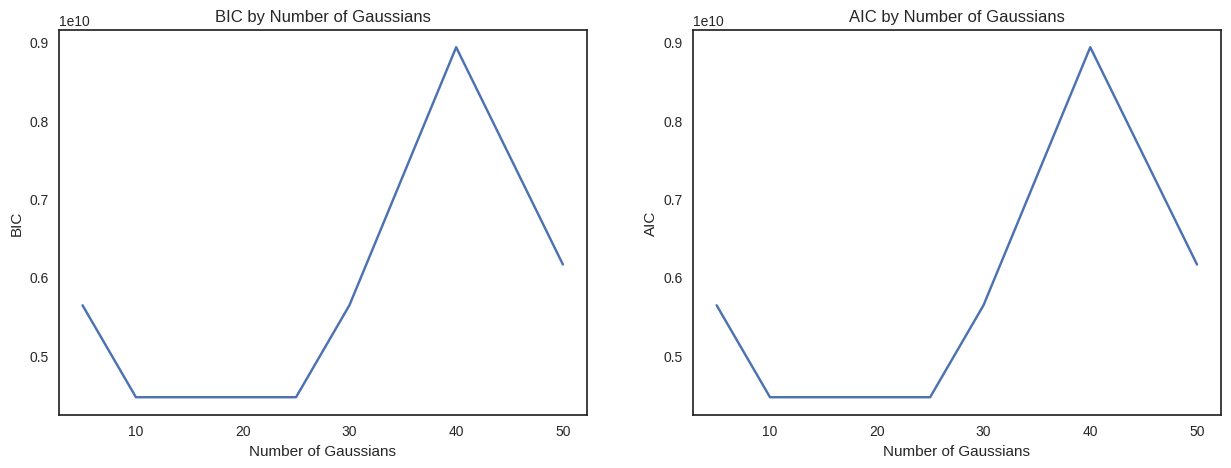

In [0]:
print "AIC & BIC Performance Score (predicted):"
evaluate_performance(train_X, 'None', predicted_X)

##Clustering - Create count for each party in each cluster and then build parties preferences matrix

In [0]:
def calculate_parties_preferences(cluster_labels, y, parties_size, clusters_count=30):
  # create clusters_array
  # 30X10 matrix in which every row is represents a cluster
  # and every col in this row means how many of this party (0,1,...,9) are in this cluster
  clusters_array = []
  clusters_array_for_count = []
  for count in xrange(clusters_count):
    clusters_array.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    clusters_array_for_count.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

  # fill clusters_array
  # each line in the array is a list of the parties dominancy inside the cluster.
  # the number is the party' dominancy in percentage (how many percent from the whole party is inside this cluster?)
  label_column = y.columns[0]
  cluster_enum = zip(cluster_labels, y[label_column])
  for gl, yl in cluster_enum:
    #print 'gl: ' + str(gl) + ' \t yl: ' + str(yl)
    # normalize count in the size of party: (1/parties_size[yl])
    #clusters_array[gl.astype(int)][yl.astype(int)] += (1.0/parties_size[yl]) 
    #clusters_array_for_count[gl.astype(int)][yl.astype(int)] += (1.0) 
    clusters_array[int(gl)][int(yl)] += (1.0/parties_size[yl]) 
    clusters_array_for_count[int(gl)][int(yl)] += (1.0) 

  # create parties_pref
  # 10X10 matrix in which every row represents the party dist:
  # every col is a percentage that party shared with the other parties
  # example: row 0 means party 0, and col 3 means how much party 0 shared a cluster with party 3.
  parties_pref = []
  for c in xrange(10):
    parties_pref.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  parties_pref

  for parties_pref_row in range(len(parties_pref)):
    # iterate over big matrix clusters_array - and calc pref for each party (i.e each row in parties_pref)
    for i in range(len(clusters_array)):
      for j in range(len(clusters_array[i])):
        parties_pref[parties_pref_row][j] += (clusters_array[i][parties_pref_row] * clusters_array[i][j])

  parties_pref_final = [[], [], [], [], [], [], [], [], [], []]
  for i in range(len(parties_pref)):
    parties_pref_final[i] = [j[0] for j in sorted(enumerate(parties_pref[i]), key=lambda x:x[1], reverse=True)]

  # remove from each party preferences itself (since it can't build a coalition with itself)
  #parties_pref_final2 = parties_pref_final
  for i in range(len(parties_pref_final)):
    parties_pref_final[i].remove(i)  

  return parties_pref_final, clusters_array_for_count

In [0]:
# Create parties preferences according to the clusters and the presence of each party in every cluster
parties_preferences, clusters_array_for_count = calculate_parties_preferences(predicted_cluster_labels, predicted_y, group_by_count(predicted_y_values), cluster_count)
print parties_preferences
print clusters_array_for_count

[[9, 6, 8, 1, 4, 5, 2, 3, 7], [8, 5, 6, 4, 3, 7, 2, 0, 9], [5, 6, 8, 1, 3, 0, 4, 7, 9], [7, 4, 1, 8, 6, 5, 2, 0, 9], [3, 7, 1, 8, 6, 5, 0, 2, 9], [1, 2, 8, 6, 4, 3, 7, 0, 9], [8, 1, 2, 5, 4, 3, 7, 0, 9], [3, 4, 1, 8, 6, 5, 0, 2, 9], [1, 6, 5, 4, 2, 3, 7, 0, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2.0, 204.0, 1.0, 0, 1.0, 18.0, 545.0, 0, 30.0, 0], [0, 12.0, 1.0, 0, 0, 9.0, 578.0, 0, 9.0, 0], [0, 1.0, 0, 0, 0, 3.0, 0, 0, 33.0, 0], [0, 0, 312.0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 19.0, 0, 0, 0, 0, 0, 0, 0], [0, 589.0, 0, 0, 0, 169.0, 32.0, 0, 22.0, 0], [81.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 112.0, 0, 5.0, 0, 4.0, 668.0, 1.0, 21.0, 0], [0, 145.0, 0, 96.0, 93.0, 5.0, 0, 35.0, 11.0, 0], [0, 0, 0, 0, 0, 407.0, 0, 0, 0, 0], [520.0, 0, 0, 0, 0, 0, 0, 0, 0, 358.0], [1.0, 1.0, 0, 1.0, 21.0, 16.0, 46.0, 0, 1.0, 0], [0, 3.0, 0, 0, 0, 0, 1.0, 0, 0, 0], [0, 0, 0, 0, 0, 197.0, 0, 0, 0, 0], [0, 82.0, 218.0, 0, 0, 230.0, 287.0, 0, 18.0, 0], [70.0, 0, 0, 0, 0, 0, 0, 0, 0, 53.0], [0, 

##Build a Steady Coalition (given parties preferences and winning party)

In [0]:
from __future__ import division

def build_coalition(winning_party, parties_sizes, total_size, parties_preferences):
  # init the coalition with the winning_party
  coalition_array = []
  coalition_array.append(winning_party)
  coalition_size = parties_sizes[winning_party]
  i = 0
  coalition_percentage = (coalition_size / total_size)
  
  while coalition_percentage < 0.5:
    # add the next prefered party to the coalition
    coalition_array.append(parties_preferences[winning_party][i])
    coalition_size += parties_sizes[parties_preferences[winning_party][i]]
    coalition_percentage = (coalition_size / total_size)
    # increment the index in the parties_preferences of the winning_party
    i += 1
    
  print "Coalition Size: {0}".format(coalition_size)
  print "Coalition Percentage: {0}".format(coalition_percentage)
  print "Coalition Parties: {0} ({1})".format(coalition_array, [labels_dictionary[party] for party in coalition_array])
  return coalition_array, coalition_size, coalition_percentage

In [0]:
# build steady coalition
winning_party = 6.0
coalition_array, coalition_size, coalition_percentage = build_coalition(int(winning_party), parties_size, total_parties_size, parties_preferences)

Coalition Size: 5738
Coalition Percentage: 0.5738
Coalition Parties: [6, 8, 1, 2] (['Purple', 'White', 'Brown', 'Green'])


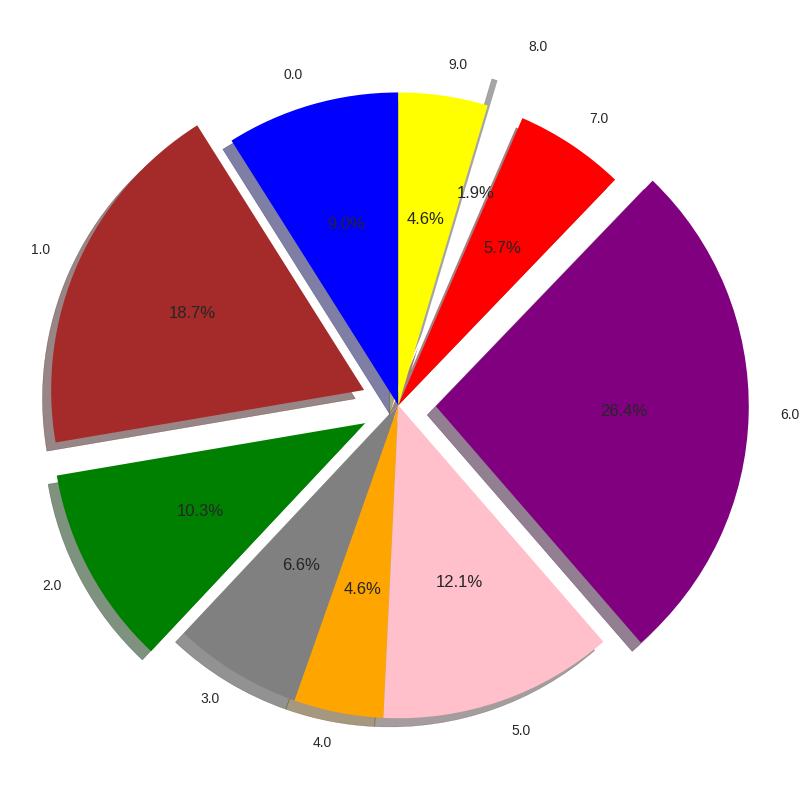

In [0]:
labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ["blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "white", "yellow"]
prediction_values = parties_size.values()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0.0, 0.12, 0.12, 0.0, 0.0, 0.0, 0.12, 0.0, 0.12, 0.0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(prediction_values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# NOTES

In [0]:
# HERE ARE THE DATA SETS TO DOWNLOAD FROM DRIVE:

#ElectionsData.csv
#https://drive.google.com/open?id=1Xdsqn2C0XR8AQnRfkWpU2JBQfK2rURe_

## NEW AFTER FIX -1:

#test_X.csv
#https://drive.google.com/open?id=10F4pfym7OgqvT1xu6Bo27WqpZjsGhhih

#test_y.csv
#https://drive.google.com/open?id=1uGX6RQFot5gww3vExfpeg1GFR8ZMFYPX

#train_X.csv
#https://drive.google.com/open?id=1mwrxBXZsgHLFO9IpWYXNfUFJnLT5yraj

#train_y.csv
#https://drive.google.com/open?id=1FHPumn9bdXiLzO5tbpGGrcvxzNpoCG0Z

#validation_X.csv
#https://drive.google.com/open?id=1HgtZC1iq9VYH8Ygo6-6XnC6G0xa8Lz01

#validation_y.csv
#https://drive.google.com/open?id=1Z_0zOORoZJVlOQ58UdXml4maSNSNBBMK

#Valid_X_with_Predicted_Vote.csv
#https://drive.google.com/open?id=1FHPumn9bdXiLzO5tbpGGrcvxzNpoCG0Z